# Data Processing Using PySpark


In [ ]:
from pyspark.sql import SparkSession

# Step 1: Initialize Spark Session
spark = SparkSession.builder \
    .appName("Movie Ratings Analysis") \
    .getOrCreate()

# Step 2: Load the Dataset
movies_file = "/content/Netflix_Dataset_Movie.csv"
ratings_file = "/content/Netflix_Dataset_Rating.csv"

movies_df = spark.read.option("header", "true").csv(movies_file)
ratings_df = spark.read.option("header", "true").csv(ratings_file)

# Step 3: Data Transformation
# Convert rating column to float for computations
ratings_df = ratings_df.withColumn("rating", ratings_df["rating"].cast("float"))

# Step 4: Average Ratings for Each Movie
average_ratings = ratings_df.groupBy("Movie_Id").agg({"rating": "avg"}) \
    .withColumnRenamed("avg(rating)", "average_rating")
average_ratings.show()

# Step 5: Top 10 Highest-Rated Movies
top_movies = average_ratings.orderBy("average_rating", ascending=False).limit(10)


# Step 6: Join with Movie Titles
# Use "Movie_ID" instead of "Movie_Id" for movies_df and select "Name" instead of "title"
top_movies_with_titles = top_movies.join(movies_df, top_movies["Movie_Id"] == movies_df["Movie_ID"])

# Step 7: Display Results
print("Top 10 Highest-Rated Movies:")
# Select "Name" instead of "title"
print(top_movies_with_titles.select("Name", "average_rating").show())






+--------+------------------+
|Movie_Id|    average_rating|
+--------+------------------+
|     829|3.1568487444960134|
|    2136|3.2575097184591826|
|    2162| 4.375887066005341|
|    1394| 2.937367931704843|
|     919|3.2370492635855763|
|    1746| 3.395134914145544|
|    1528|3.8239942528735633|
|    2161| 3.518536467167434|
|     334|3.5359146802499106|
|     577| 4.199307616221563|
|    1043| 3.281600351725654|
|    1425|3.6925212772378826|
|    2129| 4.172023540063377|
|     442|3.9139804175794697|
|     711| 3.591066531967095|
|    1104| 3.121197252208047|
|    1956|3.7405099150141643|
|    2200|2.9728972164126004|
|     232| 3.166562304320601|
|     700|3.6402808036794965|
+--------+------------------+
only showing top 20 rows

Top 10 Highest-Rated Movies:
+--------------------+-----------------+
|                Name|   average_rating|
+--------------------+-----------------+
|The Best of Frien...|4.449167996352861|
|Six Feet Under: S...|4.461601211979955|
|Gilmore Girls: Se..

# Visualisation

       genre  count
0        296      1
1        467      1
2        675      1
3        691      1
4        829      1
...      ...    ...
17765   6474      1
17766   7340      1
17767  12218      1
17768  16349      1
17769  17081      1

[17770 rows x 2 columns]


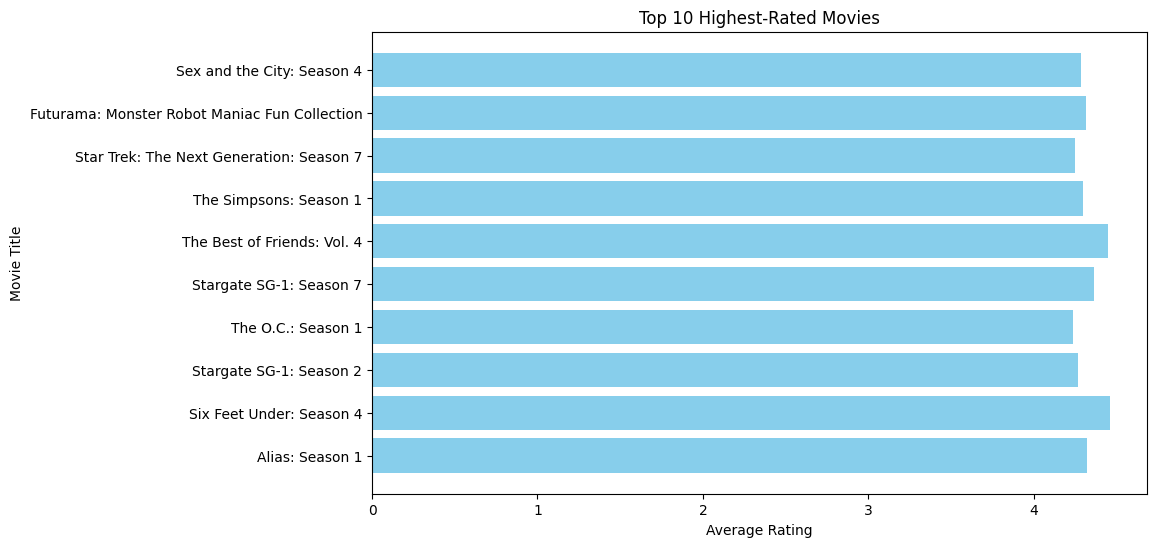

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert PySpark DataFrame to Pandas DataFrame for Visualization

top_movies_pd = top_movies_with_titles.select("Name", "average_rating").toPandas()

from pyspark.sql.functions import explode, split, count

genre_ratings = movies_df.withColumn("genre", explode(split(movies_df["Movie_ID"], ", ")))\
                        .groupBy("genre").agg(count("*").alias("count"))\
                        .orderBy("count", ascending=False)

genre_ratings_pd = genre_ratings.select("genre", "count").toPandas()
print(genre_ratings_pd)


# Top 10 Movies Bar Plot
plt.figure(figsize=(10, 6))
plt.barh(top_movies_pd["Name"], top_movies_pd["average_rating"], color='skyblue')
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 Highest-Rated Movies")
plt.gca().invert_yaxis()  # To display the highest-rated movie at the top
plt.show()